# Exploratory Data Analysis - Retail

    1) Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’
    2) As a business manager, try to find out the weak areas where you can work to make more profit.
    3) What all business problems you can derive by exploring the data?
    4) I used Python to perform EDA on this dataset.
    5) Dataset: https://bit.ly/3i4rbWl

                                                                                  :-Nupur Kanungo

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("SampleSuperstore.csv")

## Basic Data Insights

In [4]:
df.sample(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
6661,Second Class,Consumer,United States,Lawrence,Massachusetts,1841,East,Office Supplies,Appliances,113.920,2,0.0,33.0368
9482,Second Class,Home Office,United States,Philadelphia,Pennsylvania,19134,East,Technology,Accessories,319.984,2,0.2,91.9954
2607,Standard Class,Corporate,United States,Arlington,Texas,76017,Central,Technology,Accessories,24.672,3,0.2,0.0000
1521,Standard Class,Consumer,United States,Tucson,Arizona,85705,West,Furniture,Furnishings,206.112,6,0.2,48.9516
160,First Class,Consumer,United States,Los Angeles,California,90045,West,Office Supplies,Paper,5.980,1,0.0,2.6910


In [5]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [6]:
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [7]:
df.shape

(9994, 13)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [10]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


## Number of unique values in each column

In [11]:
for i in df.columns:
    print(i,len(df[i].unique()))

Ship Mode 4
Segment 3
Country 1
City 531
State 49
Postal Code 631
Region 4
Category 3
Sub-Category 17
Sales 5825
Quantity 14
Discount 12
Profit 7287


## Check for null values

In [12]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

## Data Visualization

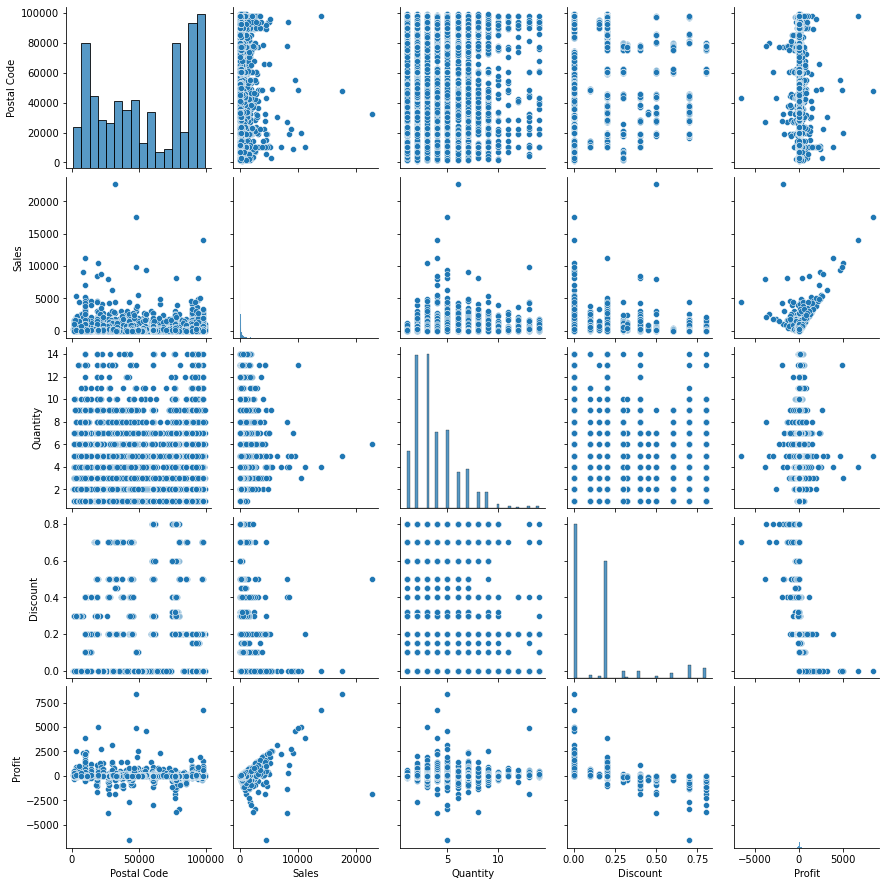

In [13]:
sns.pairplot(df)

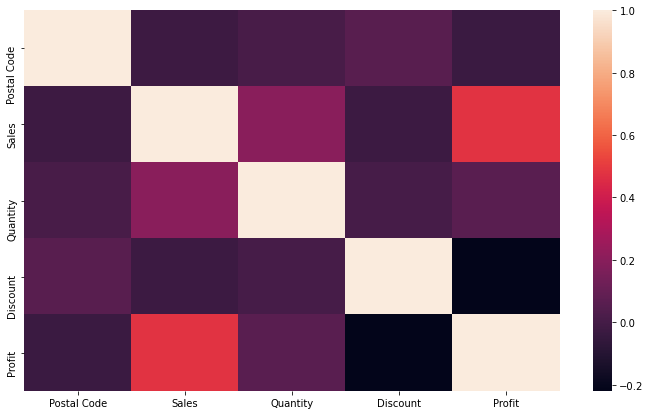

In [14]:
fig,axes = plt.subplots(1,1,figsize=(12,7))
sns.heatmap(df.corr())
plt.show()

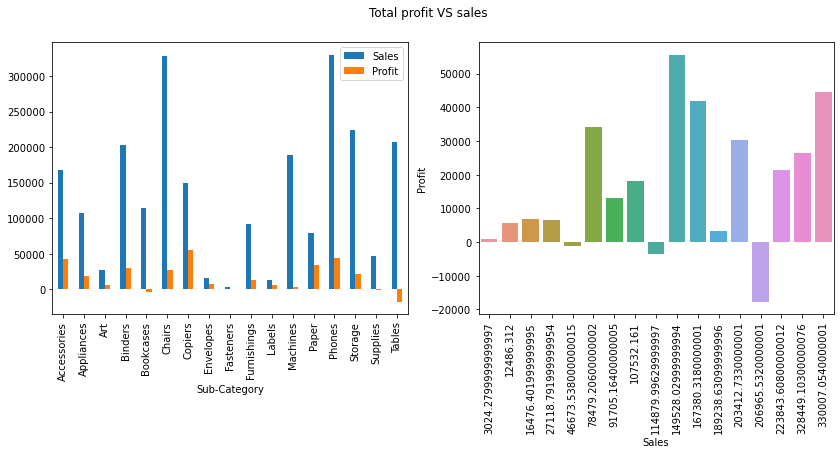

In [15]:
fig,axes = plt.subplots(1,2,figsize=(14,5))
fig.suptitle("Total profit VS sales ")
sns.barplot(data=df.groupby('Sub-Category')['Sales','Profit'].agg(sum),x='Sales',y='Profit',ax=axes[1])
df.groupby('Sub-Category')['Sales','Profit'].agg(sum).plot(kind='bar',ax=axes[0])
plt.xticks(rotation=90)
plt.show()

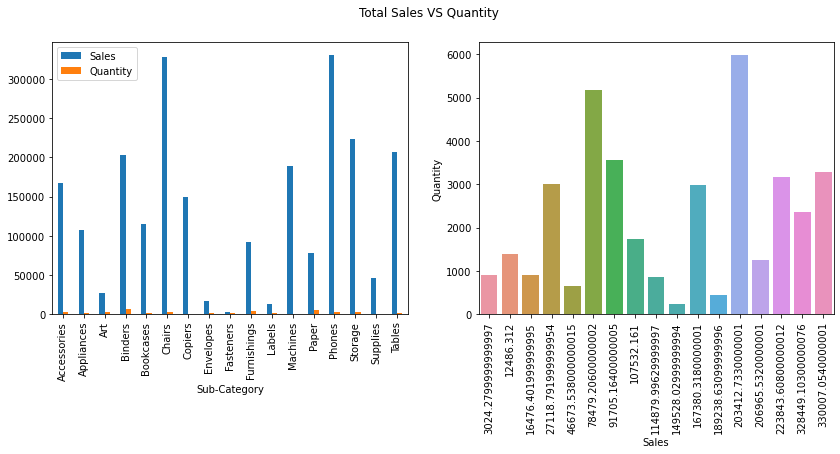

In [16]:
fig,axes = plt.subplots(1,2,figsize=(14,5))
fig.suptitle("Total Sales VS Quantity ")
sns.barplot(data=df.groupby('Sub-Category')['Sales','Quantity'].agg(sum),x='Sales',y='Quantity',ax=axes[1])
df.groupby('Sub-Category')['Sales','Quantity'].agg(sum).plot(kind='bar',ax=axes[0])
plt.xticks(rotation=90)
plt.show()

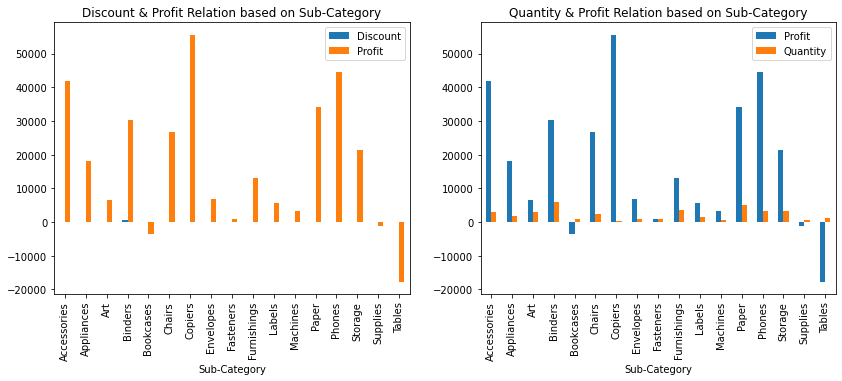

In [17]:
fig,axes = plt.subplots(1,2,figsize=(14,5))
df.groupby('Sub-Category')['Discount','Profit'].agg(sum).plot(kind='bar',ax=axes[0]).set_title('Discount & Profit Relation based on Sub-Category')
df.groupby('Sub-Category')['Profit','Quantity'].agg(sum).plot(kind='bar',ax=axes[1]).set_title('Quantity & Profit Relation based on Sub-Category')
plt.xticks(rotation=90)
plt.show()

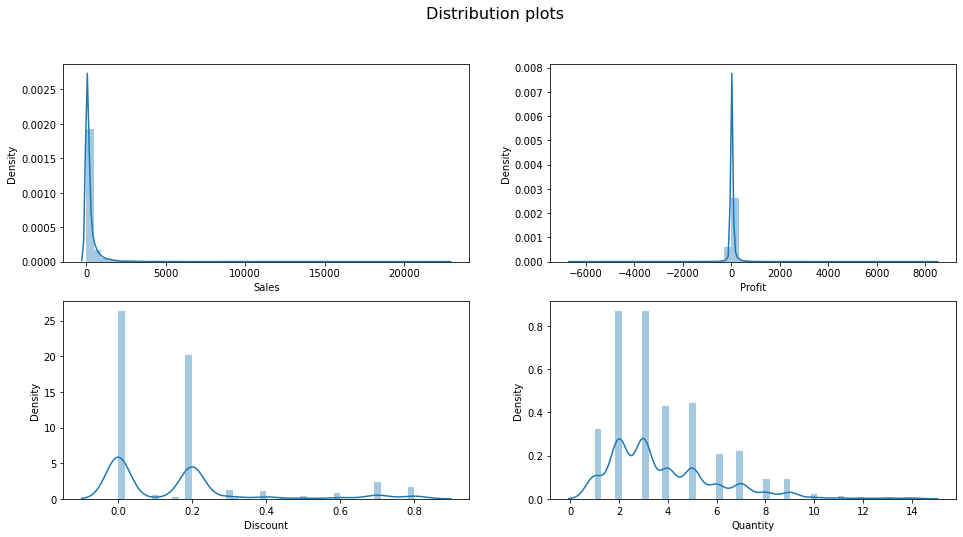

In [18]:
fig,axes = plt.subplots(2,2,figsize=(16,8))
fig.suptitle("Distribution plots", fontsize=16)
sns.distplot(df['Sales'],ax=axes[0,0])
sns.distplot(df['Profit'],ax=axes[0,1])
sns.distplot(df['Discount'],ax=axes[1,0])
sns.distplot(df['Quantity'],ax=axes[1,1])
plt.show()

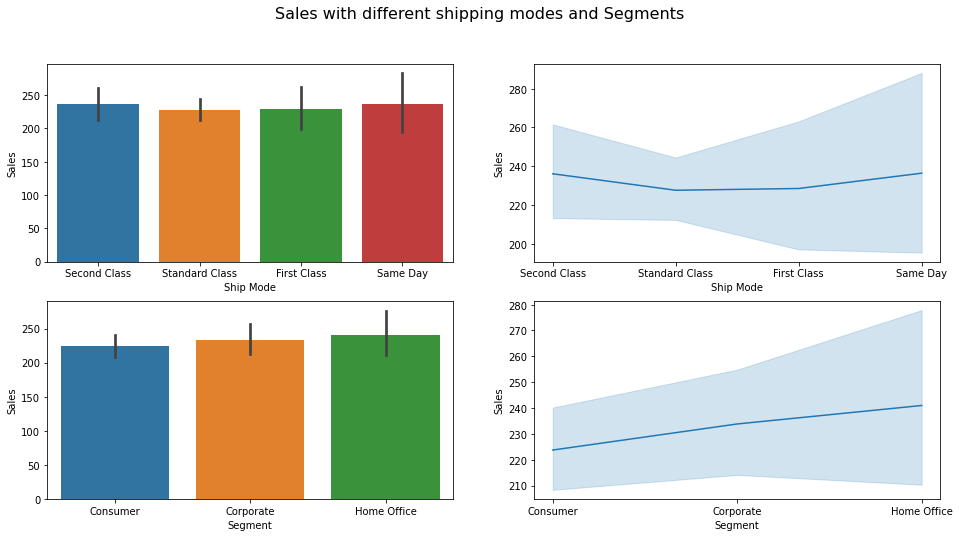

In [19]:
fig,axes = plt.subplots(2,2,figsize=(16,8))
fig.suptitle("Sales with different shipping modes and Segments", fontsize=16)
sns.barplot(df['Ship Mode'],df['Sales'],ax=axes[0,0])
sns.lineplot(df['Ship Mode'],df['Sales'],ax=axes[0,1])
sns.barplot(df['Segment'],df['Sales'],ax=axes[1,0])
sns.lineplot(df['Segment'],df['Sales'],ax=axes[1,1])
plt.show()

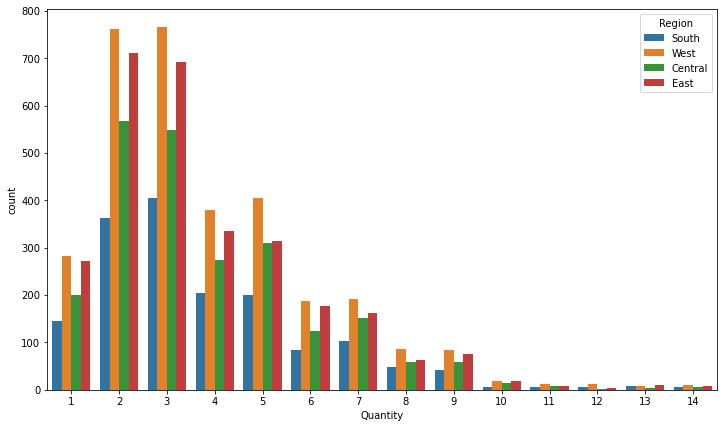

In [20]:
fig,ax= plt.subplots(1,1,figsize=(12,7))
sns.countplot(df['Quantity'],hue=df['Region'])
plt.show()

## Some important Findings
<ul>
    <li>The features Profit and Discounts are highly related.</li>
<li>Over Less quantity of products also the sales were high.</li>
<li>The maximum quantity of product in demand was in range 2-4.</li>
<li>The mode of shipping doesn't affect much to the sales</li>
<li>The Home Office provides highest sales followed by Corporate by a slight variation</li>
</ul>

# THANK YOU :)